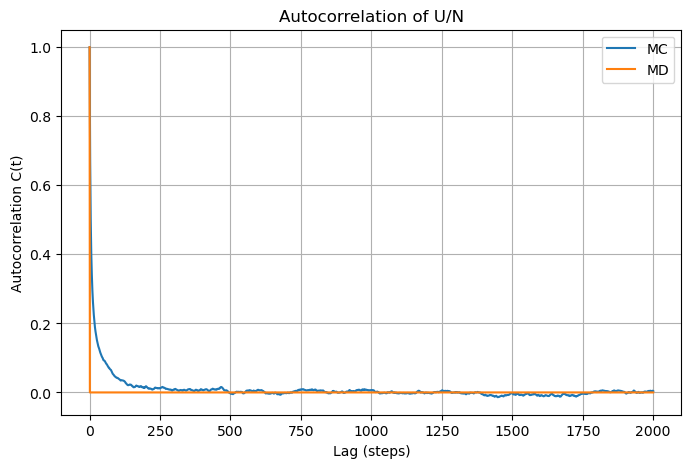

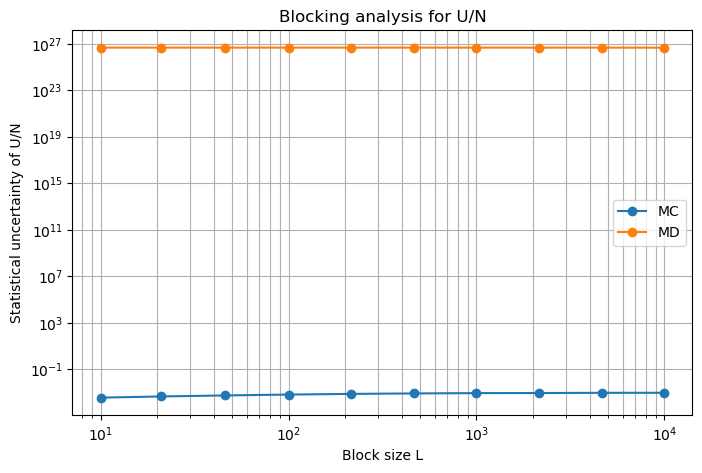

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# === FUNZIONI ===

def load_PE(filename):
    """Carica la colonna ACTUAL_PE (colonna 2) dal file potential_energy.dat"""
    data = []
    with open(filename, "r") as f:
        for line in f:
            if line.startswith("#"):
                continue
            parts = line.split()
            if len(parts) >= 2:
                data.append(float(parts[1]))  # colonna ACTUAL_PE
    return np.array(data)

def autocorrelation(x, max_lag=2000):
    """Autocorrelazione normalizzata fino a max_lag"""
    x = x - np.mean(x)
    n = len(x)
    result = np.correlate(x, x, mode='full')
    ac = result[n-1:n+max_lag] / result[n-1]
    return ac

def blocking_analysis(data, block_sizes):
    """Calcola l'incertezza statistica con data blocking"""
    n = len(data)
    means, errors = [], []
    for L in block_sizes:
        n_blocks = n // L
        if n_blocks < 2:
            continue
        block_means = np.mean(data[:n_blocks*L].reshape(n_blocks, L), axis=1)
        mean = np.mean(block_means)
        err = np.std(block_means, ddof=1) / np.sqrt(n_blocks)
        means.append(mean)
        errors.append(err)
    return np.array(block_sizes[:len(means)]), np.array(means), np.array(errors)

# === MAIN ===

# Cambia qui con i tuoi file MC e MD
file_MC = "./potential_energy_montecarlo.dat"
file_MD = "./potential_energy_md.dat"

data_MC = load_PE(file_MC)
data_MD = load_PE(file_MD)

# Autocorrelazione
max_lag = 2000
ac_MC = autocorrelation(data_MC, max_lag)
ac_MD = autocorrelation(data_MD, max_lag)

plt.figure(figsize=(8,5))
plt.plot(ac_MC, label="MC")
plt.plot(ac_MD, label="MD")
plt.xlabel("Lag (steps)")
plt.ylabel("Autocorrelation C(t)")
plt.title("Autocorrelation of U/N")
plt.legend()
plt.grid()
plt.show()

# Blocking analysis
block_sizes = np.logspace(1, 4, 10, dtype=int)  # da 10 a 10000
_, _, err_MC = blocking_analysis(data_MC, block_sizes)
_, _, err_MD = blocking_analysis(data_MD, block_sizes)

plt.figure(figsize=(8,5))
plt.loglog(block_sizes[:len(err_MC)], err_MC, "o-", label="MC")
plt.loglog(block_sizes[:len(err_MD)], err_MD, "o-", label="MD")
plt.xlabel("Block size L")
plt.ylabel("Statistical uncertainty of U/N")
plt.title("Blocking analysis for U/N")
plt.legend()
plt.grid(True, which="both")
plt.show()
